In [2]:
import numpy as np
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

Running the IPython Shell:
You can execute arbitrary Python statements by typing them and
pressing Return (or Enter). When you type just a variable into IPython, it
renders a string representation of the object:

In [3]:
import numpy as np
data = [np.random.standard_normal() for i in range(7)]
data

[-0.20470765948471295,
 0.47894333805754824,
 -0.5194387150567381,
 -0.55573030434749,
 1.9657805725027142,
 1.3934058329729904,
 0.09290787674371767]

Tab Completion:
While entering expressions in the shell, pressing
the Tab key will search the namespace for any variables (objects,
functions, etc.) matching the characters you have typed so far and
show the results in a convenient drop-down menu:

In [4]:
an_apple =27
an_example =42
an<Tab>

SyntaxError: invalid syntax (1947019225.py, line 3)

In [ ]:
b =[1, 2, 3]
b.<Tab>


In [ ]:
import numpy as np
np.<Tab>

Introspection:
Using a question mark (?) before or after a variable will display some
general information about the object:

In [5]:
a = [1, 2, 3]
a?

Indentation, not braces:
Python uses whitespace (tabs or spaces) to structure code instead of
using braces as in many other languages like R, C++, Java, and Perl.
Consider a for loop from a sorting algorithm:

In [ ]:
for x in array:
    if x < pivot:
        less.append(x)
    else:
        greater.append(x)

As you can see by now, Python statements also do not need to be
terminated by semicolons. Semicolons can be used, however, toseparate multiple statements on a single line:


In [24]:
a =5; b =6; c =7

Comments
Any text preceded by the hash mark (pound sign) # is ignored by the
Python interpreter. This is often used to add comments to code. At
times you may also want to exclude certain blocks of code without
deleting them. One solution is to comment out the code:

In [ ]:
results =[]
for line in file_handle:
# keep the empty lines for now
# if len(line) == 0:
# continue
    results.append(line.replace("foo", "bar"))

When assigning a variable (or name) in Python, you are creating a
reference to the object shown on the righthand side of the equals
sign. In practical terms, consider a list of integers:

In [7]:
b = a
b

[1, 2, 3]

In Python, a and b actually now refer to the same object,
the original list [1, 2, 3]. You can prove this to yourself by appending an element to a and then examining b:

In [9]:
a.append(4)
b

[1, 2, 3, 4]

When you pass objects as arguments to a function, new local variables
are created referencing the original objects without any copying. If you
bind a new object to a variable inside a function, that will not overwrite a
variable of the same name in the “scope” outside of the function (the
“parent scope”). It is therefore possible to alter the internals of a
mutable argument. Suppose we had the following function:

In [10]:
def append_element(some_list, element):
    some_list.append(element)

In [11]:
data = [1, 2, 3]
append_element(data, 4)
data

[1, 2, 3, 4]

Dynamic references, strong types:
Variables in Python have no inherent type associated with them; a
variable can refer to a different type of object simply by doing an
assignment. There is no problem with the following:

In [25]:
a = 5
type(a)

int

In [26]:
a = "foo"
type(a)

str

Variables are names for objects within a particular namespace; the type
information is stored in the object itself. Some observers might hastily
conclude that Python is not a “typed language.” This is not true;
consider this example:

In [13]:
"5" + 5

TypeError: can only concatenate str (not "int") to str

In some languages, the string '5' might get implicitly converted (or cast)
to an integer, thus yielding 10. In other languages the integer 5 might be
cast to a string, yielding the concatenated string '55'. In Python, such
implicit casts are not allowed. In this regard we say that Python is a
strongly typed language, which means that every object has a
specific type (or class), and implicit conversions will occur only in
certain permitted circumstances, such as:

In [14]:
a = 4.5
b = 2
# String formatting, to be visited later
print(f"a is {type(a)}, b is {type(b)}")
a / b

a is <class 'float'>, b is <class 'int'>


2.25

Knowing the type of an object is important, and it’s useful to be able to
write functions that can handle many different kinds of input. You can
check that an object is an instance of a particular type using the
isinstance function:

In [15]:
a = 5
isinstance(a, int)

True

sinstance can accept a tuple of types if you want to check that an
object’s type is among those present in the tuple:

In [27]:
a = 5; b = 4.5
isinstance(a, (int, float))

True

In [28]:
isinstance(b, (int, float))

True

ttributes and methods
Objects in Python typically have both attributes (other Python objects
stored “inside” the object) and methods (functions associated with an
object that can have access to the object’s internal data). Both of
them are accessed via the syntax obj.attribute_name:

In [20]:
a = "foo"
a.<Tab>

Attributes and methods can also be accessed by name via the getattr
function

In [21]:
getattr(a, "split")

<function str.split(sep=None, maxsplit=-1)>

Duck typing:
Often you may not care about the type of an object but rather only
whether it has certain methods or behavior. This is sometimes called
duck typing, after the saying “If it walks like a duck and quacks like aduck, then it’s a duck.” For example, you can verify that an object is
iterable if it implements the iterator protocol. For many objects, this
means it has an __iter__ “magic method,” though an alternative and
better way to check is to try using the iter function:

In [29]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError: # not iterable
        return False

This function would return True for strings as well as most Python
collection types:

In [30]:
isiterable("a string")


True

In [31]:
isiterable([1, 2, 3])


True

In [32]:
isiterable(5)

False

Imports
In Python, a module is simply a file with the .py extension containing
Python code. Suppose we had the following module:

In [33]:
# some_module.py
PI =3.14159
def f(x):
    return x + 2
def g(a, b):
    return a + b

 If we wanted to access the variables and functions defined in
some_module.py, from another file in the same directory we could do:


In [34]:
import some_module
result =some_module.f(5)
pi =some_module.PI

ModuleNotFoundError: No module named 'some_module'

Or alternately:


In [43]:
from some_module import g, PI
result =g(5, PI)


ModuleNotFoundError: No module named 'some_module'

By using the as keyword, you can give imports different variable names:


In [ ]:
import some_module as sm
from some_module import PI as pi, g as gf
r1 =sm.f(pi)
r2 =gf(6, pi)

Binary operators and comparisons
Most of the binary math operations and comparisons use familiar
mathematical syntax used in other programming languages:

In [36]:
5 - 7

-2

In [37]:
12 + 21.5


33.5

In [38]:
5 <= 2

False

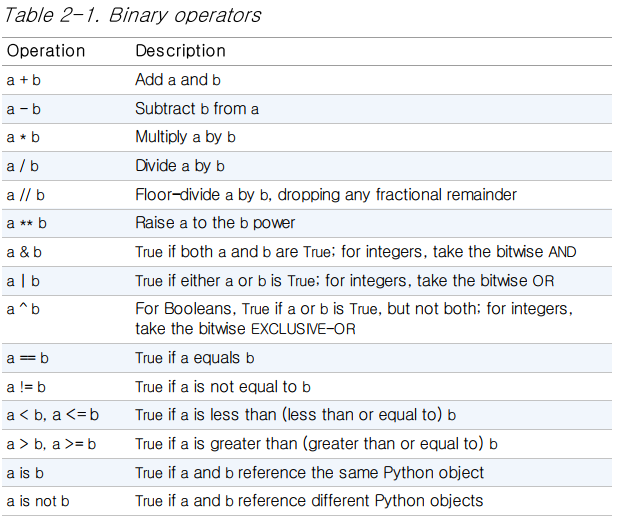

To check if two variables refer to the same object, use the is keyword.
Use is not to check that two objects are not the same:

In [39]:
a = [1, 2, 3]
b = a
c = list(a)
a is b


True

In [40]:
a is not c

True

Since the list function always creates a new Python list (i.e., a copy),
we can be sure that c is distinct from a. Comparing with is is not the
same as the == operator, because in this case we have:

In [41]:
a == c

True

A common use of is and is not is to check if a variable is None, since
there is only one instance of None:

In [20]:
a = None
a is None

Mutable and immutable objects
Many objects in Python, such as lists, dictionaries, NumPy arrays, and
most user-defined types (classes), are mutable. This means that the
object or values that they contain can be modified:

In [42]:
a_list = ["foo", 2, [4, 5]]
a_list[2] = (3, 4)
a_list

['foo', 2, (3, 4)]

Others, like strings and tuples, are immutable, which means their internal
data cannot be changed:

In [22]:
a_tuple = (3, 5, (4, 5))
a_tuple[1] = "four"

Scalar Types
Python has a small set of built-in types for handling numerical data,
strings, Boolean (True or False) values, and dates and time. These
“single value” types are sometimes called scalar types, and we refer
to them in this book as scalars . 
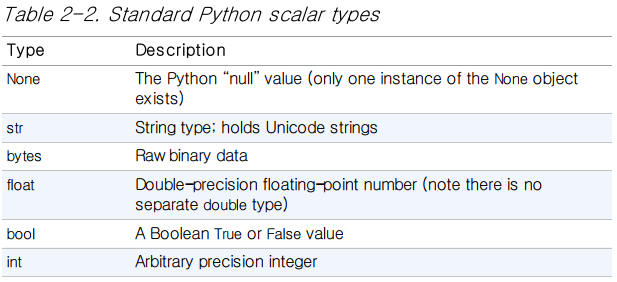


Numeric types
The primary Python types for numbers are int and float. An int can store
arbitrarily large numbers

In [44]:
ival = 17239871
ival ** 6

26254519291092456596965462913230729701102721

Floating-point numbers are represented with the Python float type.
Under the hood, each one is a double-precision value. They can also
be expressed with scientific notation:

In [24]:
fval = 7.243
fval2 = 6.78e-5

Integer division not resulting in a whole number will always yield a
floating-point number:

In [46]:
3 / 2

1.5

To get C-style integer division (which drops the fractional part if the
result is not a whole number), use the floor division operator //:

In [48]:
3 // 2

1

The Python string type is str.
For multiline strings with line breaks, you can use triple quotes, either '''
or """:

In [51]:
c = """
This is a longer string that
spans multiple lines
"""

It may surprise you that this string c actually contains four lines of text;
the line breaks after """ and after lines are included in the string. We can
count the new line characters with the count method on c:

In [52]:
c.count("\n")

3

Python strings are immutable; you cannot modify a string:

In [53]:
a = "this is a string"
a[10] = "f"

TypeError: 'str' object does not support item assignment

If we need to modify a string, we
have to use a function or method that creates a new string, such as
the string replace method:

In [54]:
b = a.replace("string", "longer string")
b

'this is a longer string'

Afer this operation, the variable a is unmodified:

In [55]:
a

'this is a string'

Many Python objects can be converted to a string using the str
function:

In [56]:
a = 5.6
s = str(a)
print(s)

5.6


Strings are a sequence of Unicode characters and therefore can be
treated like other sequences, such as lists and tuples:

In [57]:
s = "python"
list(s)


['p', 'y', 't', 'h', 'o', 'n']

In [58]:
s[:3]

'pyt'

The backslash character \ is an escape character, meaning that it is
used to specify special characters like newline \n or Unicode
characters. To write a string literal with backslashes, you need to
escape them:

In [59]:
s = "12\\34"
print(s)

12\34


Fortunately you can preface the
leading quote of the string with r (The r stands for raw), which means that the characters
should be interpreted as is:

In [61]:
s = r"this\has\no\special\characters"
s

'this\\has\\no\\special\\characters'

Adding two strings together concatenates them and produces a new
string:

In [62]:
a = "this is the first half "
b = "and this is the second half"
a + b

'this is the first half and this is the second half'

String
objects have a format method that can be used to substitute formatted
arguments into the string, producing a new string:

In [63]:
template = "{0:.2f} {1:s} are worth US${2:d}"

In this string:
{0:.2f} means to format the first argument as a floating-point
number with two decimal places.
{1:s} means to format the second argument as a string.
{2:d} means to format the third argument as an exact integer.
To substitute arguments for these format parameters, we pass a
sequence of arguments to the format method:

In [64]:
template.format(88.46, "Argentine Pesos", 1)

'88.46 Argentine Pesos are worth US$1'

To create an f-string, write the character f
immediately preceding a string literal. Within the string, enclose Pythonexpressions in curly braces to substitute the value of the expression
into the formatted string:

In [66]:
amount = 10
rate = 88.46
currency = "Pesos"
result = f"{amount} {currency} is worth US${amount / rate}"

In [67]:
f"{amount} {currency} is worth US${amount / rate:.2f}"

'10 Pesos is worth US$0.11'

You could convert to Unicode
assuming you knew the character encoding. Here is an example
Unicode string with non-ASCII characters:

In [68]:
val = "español"
val

'español'

We can convert this Unicode string to its UTF-8 bytes representation
using the encode method:

In [69]:
val_utf8 = val.encode("utf-8")
val_utf8
type(val_utf8)

bytes

Assuming you know the Unicode encoding of a bytes object, you can
go back using the decode method:

In [70]:
val_utf8.decode("utf-8")

'español'

While it is now preferable to use UTF-8 for any encoding, for historical
reasons you may encounter data in any number of different encodings:

In [71]:
val.encode("latin1")


b'espa\xf1ol'

In [72]:
val.encode("utf-16")


b'\xff\xfee\x00s\x00p\x00a\x00\xf1\x00o\x00l\x00'

In [73]:
val.encode("utf-16le")

b'e\x00s\x00p\x00a\x00\xf1\x00o\x00l\x00'

Booleans
The two Boolean values in Python are written as True and False.
Comparisons and other conditional expressions evaluate to either True
or False. Boolean values are combined with the and and or keywords:

In [74]:
True and True


True

In [75]:
False or True

True

In [ ]:
When converted to numbers, False becomes 0 and True becomes 1:

In [78]:
int(False)


0

In [77]:
int(True)

1

The keyword not flips a Boolean value from True to False or vice versa:

In [79]:
a = True
b = False
not a


False

In [80]:
not b

True

Type casting
The str, bool, int, and float types are also functions that can be used
to cast values to those types:

In [48]:
s = "3.14159"
fval = float(s)
type(fval)


In [ ]:
int(fval)


In [ ]:
bool(fval)


In [ ]:
bool(0)

None
None is the Python null value type:

In [49]:
a = None
a is None


In [ ]:
b = 5
b is not None

Dates and times
The built-in Python datetime module provides datetime, date, and time
types. The datetime type combines the information stored in date and
time and is the most commonly used:

In [50]:
from datetime import datetime, date, time
dt = datetime(2011, 10, 29, 20, 30, 21)
dt.day


In [ ]:
dt.minute

Given a datetime instance, you can extract the equivalent date and
time objects by calling methods on the datetime of the same name:

In [51]:
dt.date()
dt.time()

The strftime method formats a datetime as a string:

In [52]:
dt.strftime("%Y-%m-%d %H:%M")

Strings can be converted (parsed) into datetime objects with the
strptime function:

In [53]:
datetime.strptime("20091031", "%Y%m%d")

When you are aggregating or otherwise grouping time series data, it will
occasionally be useful to replace time fields of a series of datetimes—
for example, replacing the minute and second fields with zero:

In [54]:
dt_hour = dt.replace(minute=0, second=0)
dt_hour

Since datetime.datetime is an immutable type, methods like these
always produce new objects. So in the previous example, dt is not
modified by replace:

In [55]:
dt

The difference of two datetime objects produces a datetime.timedelta
type:

In [82]:
dt2 = datetime(2011, 11, 15, 22, 30)
delta = dt2 - dt
delta


NameError: name 'datetime' is not defined

In [81]:
type(delta)

NameError: name 'delta' is not defined

Adding a timedelta to a datetime produces a new shifted datetime:

In [57]:
dt


In [ ]:
dt + delta

An if statement can be optionally followed by one or more elif blocks
and a catchall else block if all of the conditions are False:
if x < 0:
print("It's negative")
elif x ==0:
print("Equal to zero")
elif 0 < x < 5:
print("Positive but smaller than 5")
else:
print("Positive and larger than or equal to 5")
If any of the conditions are True, no further elif or else blocks will be
reached. With a compound condition using and or or, conditions are
evaluated left to right and will short-circuit:

In [83]:
a = 5; b = 7
c = 8; d = 4
if a < b or c > d:
    print("Made it")

Made it


In [59]:
4 > 3 > 2 > 1

You can advance a for loop to the next iteration, skipping the remainder
of the block, using the continue keyword. Consider this code, which
sums up integers in a list and skips None values:
sequence =[1, 2, None, 4, None, 5]
total =0
for value in sequence:
if value is None:
continue
total +=value
A for loop can be exited altogether with the break keyword. This code
sums elements of the list until a 5 is reached:
sequence =[1, 2, 0, 4, 6, 5, 2, 1]
total_until_5 =0
for value in sequence:
if value ==5:
break
total_until_5 +=value
The break keyword only terminates the innermost for loop; any outer for
loops will continue to run:

In [84]:
for i in range(4):
    for j in range(4):
        if j > i:
            break
        print((i, j))


(0, 0)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)
(3, 3)


A while loop specifies a condition and a block of code that is to be
executed until the condition evaluates to False or the loop is explicitly
ended with break:
x =256
total =0
while x > 0:
if total > 500:
break
total +=x
x =x // 2pass
pass is the “no-op” (or “do nothing”) statement in Python. It can be
used in blocks where no action is to be taken (or as a placeholder for
code not yet implemented); it is required only because Python uses
whitespace to delimit blocks:
if x < 0:
print("negative!")
elif x ==0:
# TODO: put something smart here
pass
else:
print("positive!")
range
The range function generates a sequence of evenly spaced integers:

In [61]:
range(10)


In [ ]:
list(range(10))

In [ ]:
A start, end, and step (which may be negative) can be given:

In [62]:
list(range(0, 20, 2))


In [ ]:
list(range(5, 0, -1))

As you can see, range produces integers up to but not including the
endpoint. A common use of range is for iterating through sequences by
index:

In [63]:
seq = [1, 2, 3, 4]
for i in range(len(seq)):
    print(f"element {i}: {seq[i]}")

While you can use functions like list to store all the integers generated
by range in some other data structure, often the default iterator form will
be what you want. This snippet sums all numbers from 0 to 99,999
that are multiples of 3 or 5:

In [85]:
total = 0
for i in range(100_000):
    # % is the modulo operator
    if i % 3 == 0 or i % 5 == 0:
        total += i
print(total)

2333316668
